In [1]:
#Business Problem Understanding

In [2]:
import numpy as nd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Data Understanding

In [7]:
data['Loan_ID'].nunique()

614

In [8]:
data.drop(columns=['Loan_ID'],inplace=True)

In [9]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [18]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [19]:
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [20]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
data['Credit_History']=data['Credit_History'].replace({1:"good",0:"bad"})

In [23]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [24]:
data['Credit_History'].value_counts()

good    475
bad      89
Name: Credit_History, dtype: int64

In [25]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [26]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [27]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [28]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [29]:
continuous=['ApplicantIncome','CoapplicantIncome','LoanAmount']

discrete_categorical=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

discrete_count=['Dependents','Loan_Amount_Term']

In [30]:
# EXPLORATORY DATA ANALYSIS


In [31]:
data[continuous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


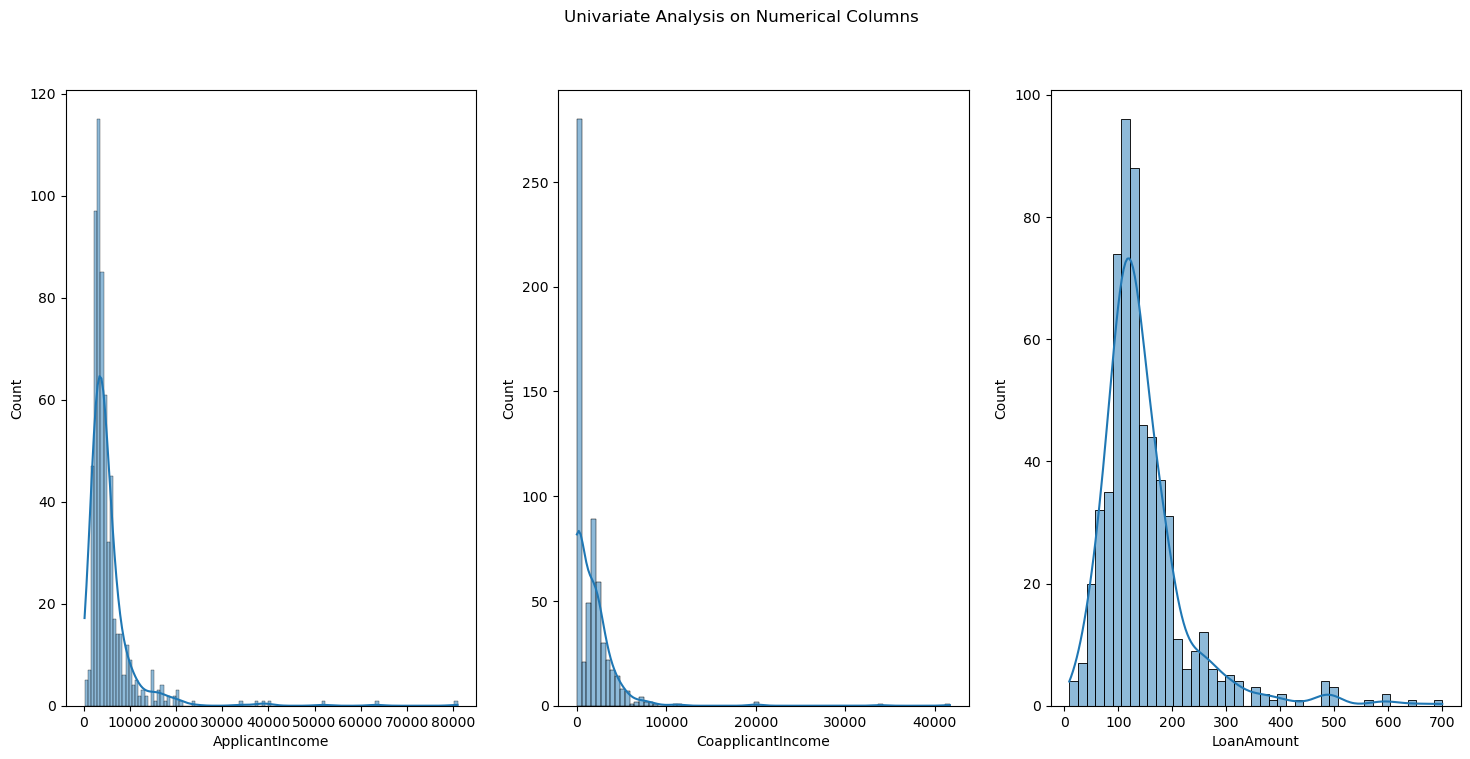

In [32]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [33]:
data[continuous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

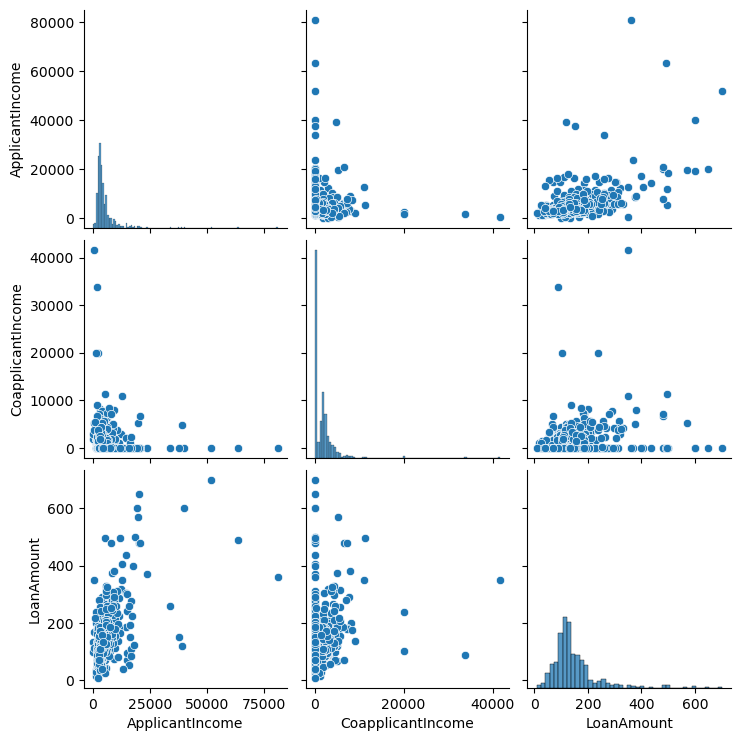

In [34]:
sns.pairplot(data[continuous])
plt.show()

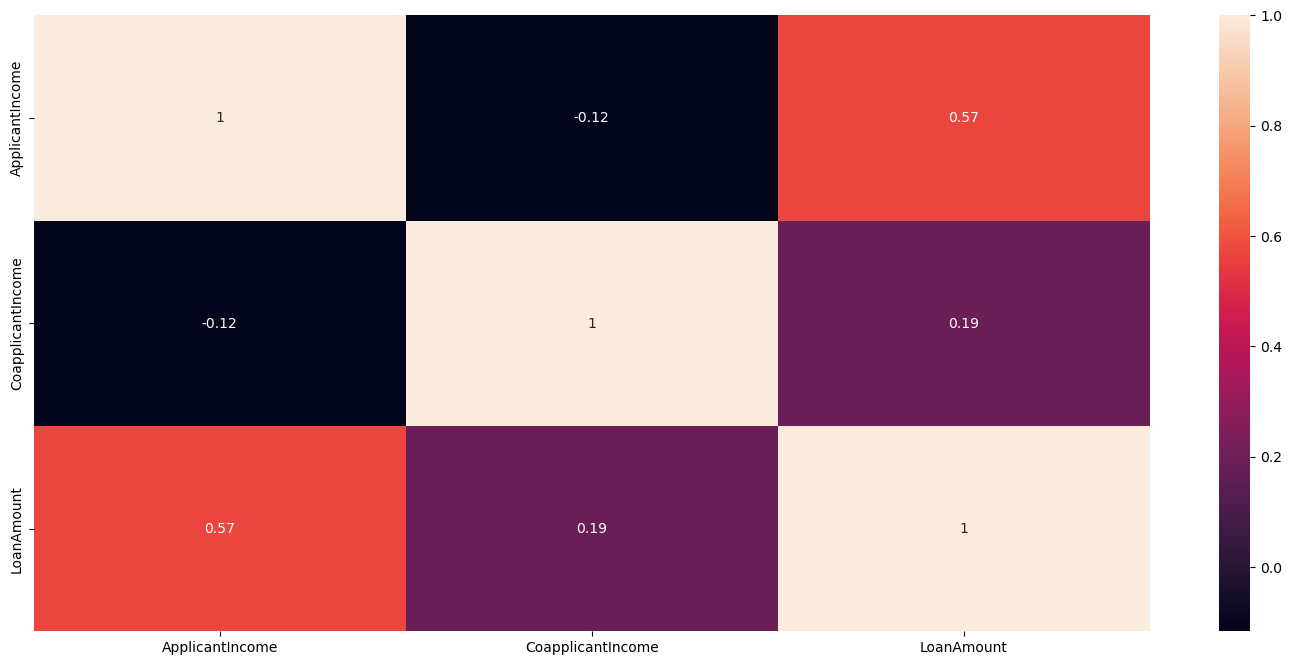

In [35]:
sns.heatmap(data[continuous].corr(),annot=True)
plt.show()

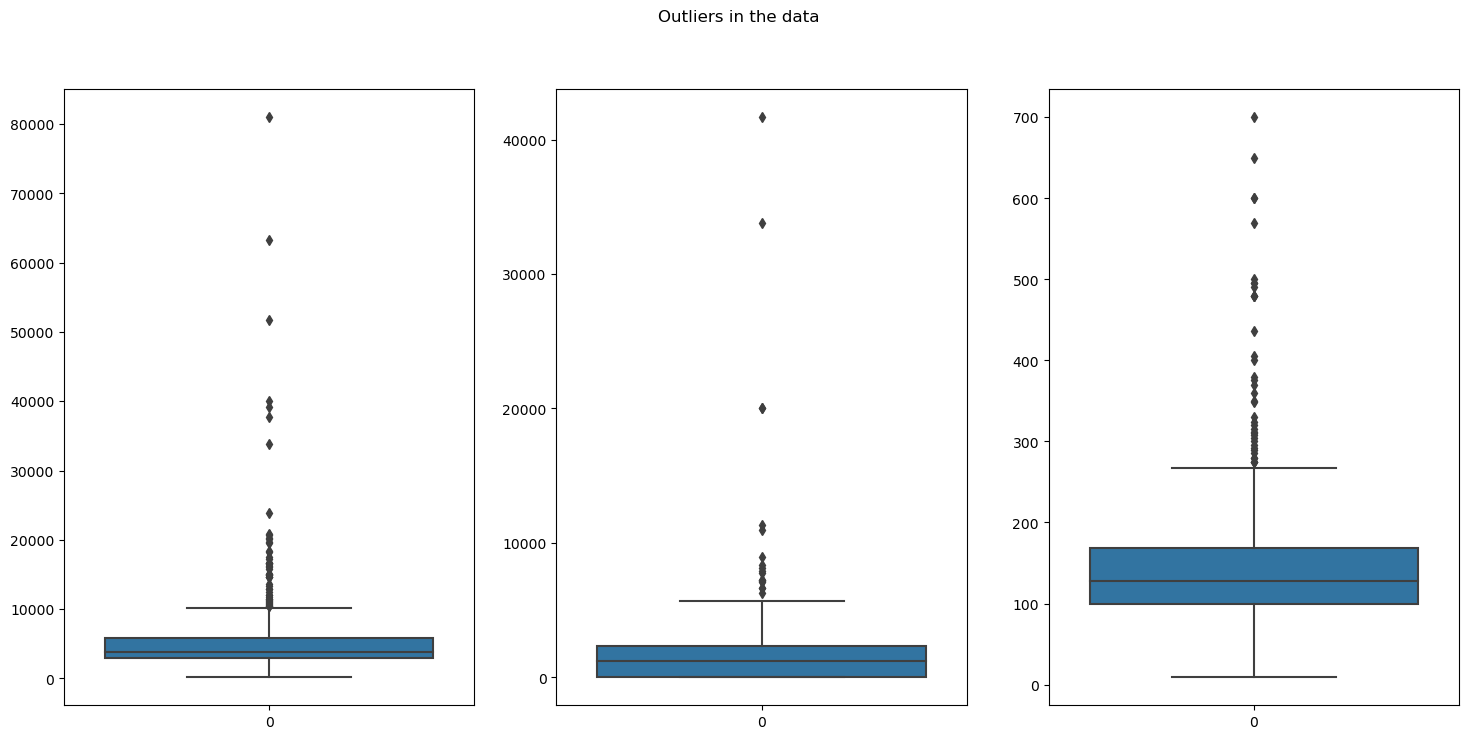

In [36]:
# lets visualize the outliers using box plot

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the data')
plt.show()





In [37]:
# for Discrete Variables

data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


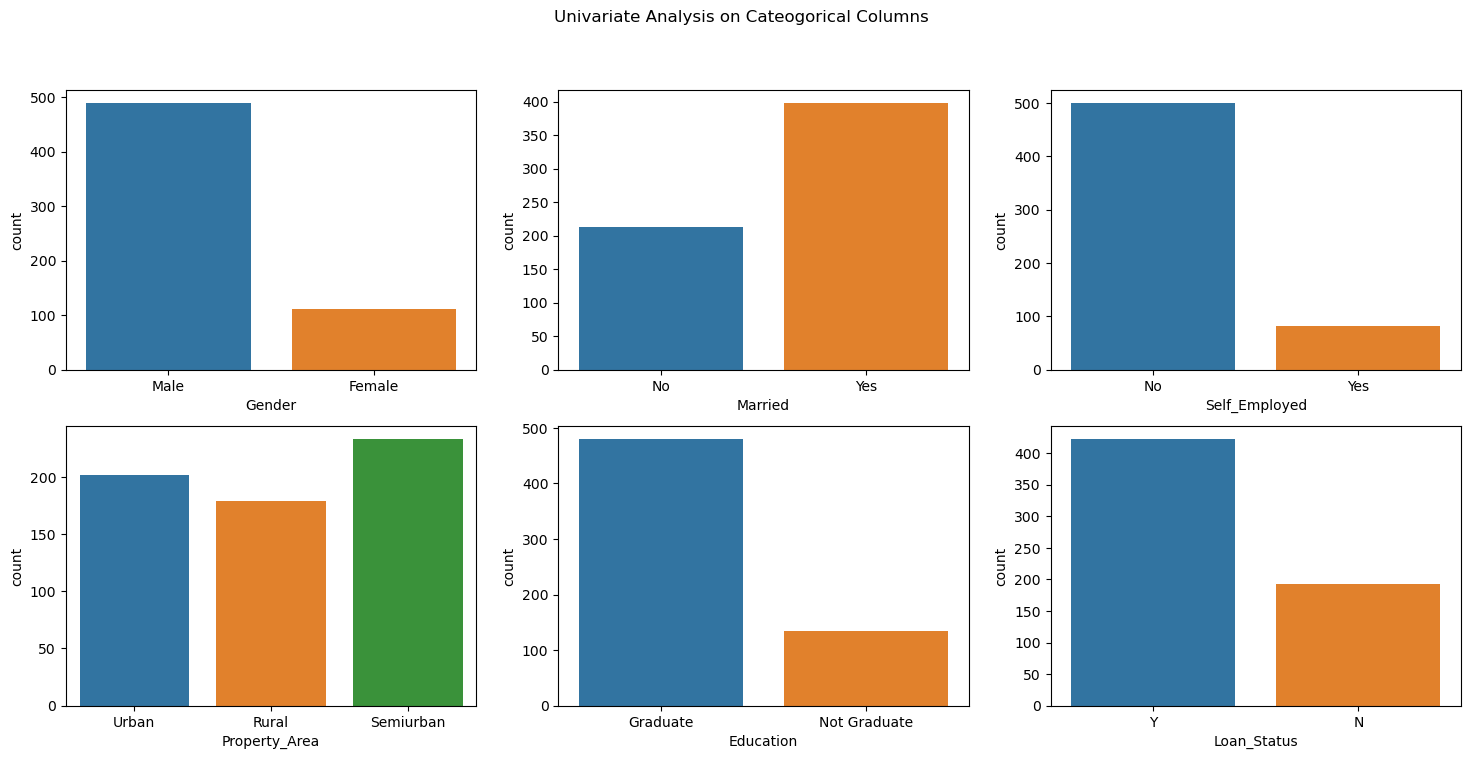

In [38]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(x=data['Gender'])

plt.subplot(2,3,2)
sns.countplot(x=data['Married'])

plt.subplot(2,3,3)
sns.countplot(x=data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(x=data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(x = data['Education'])

plt.subplot(2,3,6)
sns.countplot(x = data['Loan_Status'])

plt.suptitle('Univariate Analysis on Cateogorical Columns')
plt.show()

In [39]:
# Data Preparation
# Assuming 'data' is a pandas DataFrame
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.drop(columns=["ApplicantIncome", "CoapplicantIncome"], inplace=True)


In [40]:
# Modyfying the wrong Data

data['Dependents'] = data['Dependents'].replace({'3+':3})

In [41]:
# Missing Values Treatment

data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [42]:
# Percentage of the missing Values

data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [43]:
data=data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])

In [44]:
# Count Variable Replace with 0

data['Dependents'] = data['Dependents'].fillna(0)

In [45]:
# Cateogorical Variables replace with 0

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [46]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [47]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,good,Urban,Y,7583.0


In [48]:
# Outliers Treatment 
# Encoding

data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')
data['Credit_History'] = data['Credit_History'].map({'good':1,'bad':0}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [49]:
 # data type Conversion
    
data['Dependents']       = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

In [50]:
# Transformations
data[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [51]:
# Lets Apply Boxcox transformation to remove skewness

from scipy.stats import boxcox
data['Income'],a= boxcox(data['Income'])
data['LoanAmount'],c= boxcox(data['LoanAmount'])


In [52]:
data[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [53]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

In [54]:
# X&Y
x= data.drop('Loan_Status',axis=1)
y= data['Loan_Status']


In [55]:
# Identify the best random state number

Train= []
Test= []
CV= []

for i in range(0,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    log_default=LogisticRegression()
    log_default.fit(x_train,y_train)
    
    ypred_train=log_default.predict(x_train)
    ypred_test=log_default.predict(x_test)
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default,x_train,y_train,cv=5,scoring='accuracy').mean())

em=pd.DataFrame({'Train':Train,'Test':Test,'CV':CV})
gm=em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs=gm[gm['CV']==gm['CV'].max()].index.to_list()[0]
print('best random_state number',rs)

best random_state number 70


In [56]:
# Train_Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=rs)

In [57]:
# machine learning Modelling & Evaluation
# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

ypred_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)

print("Train Accuracy",accuracy_score(y_train,ypred_train))
print("Cross Validation Score",cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy",accuracy_score(y_test,ypred_test))

Train Accuracy 0.8226950354609929
Cross Validation Score 0.8227731092436976
Test Accuracy 0.7830188679245284


In [58]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

estimator= KNeighborsClassifier()
param_grid= {'n_neighbors': list (range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator, param_grid, scoring='accuracy',cv=5)
knn_grid.fit(x_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train=knn_model.predict(x_train)

ypred_test= knn_model.predict(x_test)

print("Train Accuracy", accuracy_score (y_train, ypred_train)) 
print("Cross validation score:", cross_val_score (knn_model, x_train,y_train, cv=5).mean()) 
print("Test Accuracy", accuracy_score (y_test,ypred_test))


Train Accuracy 0.7541371158392435
Cross validation score: 0.7375910364145659
Test Accuracy 0.7075471698113207


In [59]:
#SVM

from sklearn.svm import SVC

estimator=SVC()
param_grid={'C':[0.01, 0.1,1],'kernel':['linear','rbf','sigmoid','poly']}


from sklearn.model_selection import GridSearchCV
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(x_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train=svm_model.predict(x_train)
ypred_test =svm_model.predict(x_test)

print("Train Accuracy:", accuracy_score (y_train, ypred_train))

print("Cross validation score:",cross_val_score(svm_model,x_train,y_train,cv=5).mean())
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
Cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


In [64]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=rs)
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 16))
}

from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(x_train,y_train)

#identify the best model

dt = dt_grid.best_estimator_

#identify the importance of each feature

dt_fi=dt.feature_importances_

#identify the features where the feature importance is greater than 0
index=[i for i,x in enumerate(dt_fi) if x>0]

#create new dataset with important features 
x_train_dt=x_train.iloc[:,index]
x_test_dt=x_test.iloc[:,index]

# train with best model & with important features
dt.fit(x_train_dt,y_train)

ypred_train=dt.predict(x_train_dt)
ypred_test=dt.predict(x_test_dt)

# Evaluate the best model
print("Train Accuracy:", accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(dt,x_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.8226950354609929
cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


In [65]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=70)

In [66]:
x_train_dt

,Credit_History
158,1
119,1
448,0
519,1
391,1
...,...
70,1
370,1
140,1
252,1
